min max
[-6.4469874e-04 -1.5022233e-06] [1.002078  1.0000355]
3.15M Parameters


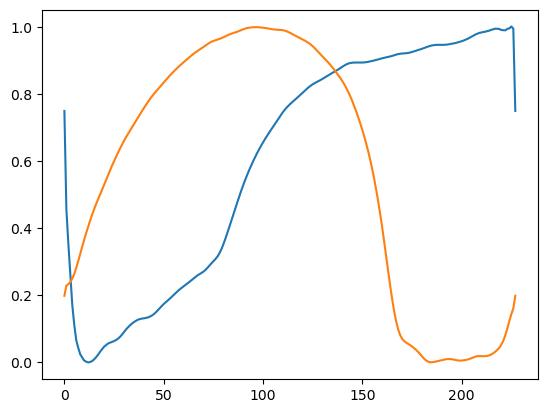

In [20]:
PATH = "/media/maxine/c8f4bcb2-c1fe-4676-877d-8e476418f5e5/0-RPE-cell-timelapse/"
from modules.learning.models import *
from modules.learning.train import train_model
from modules.utils import hc
from modules.visualize import plot_loss, plot_normalized_time_error

# from modules.learning.evaluate import Evaluation, get_latent_space, plot_umap
from matplotlib import pyplot as plt
from modules.learning.dycep import DYCEP
import json

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# enet = EfficientNet()
model = DYCEP()
model.to(DEVICE)

track_path = PATH + "track_datasets/control_mm/train/images/"
label_path = PATH + "track_datasets/control_mm/train/labels/"

#########
# test on one track
#########

track_name = "0607.1629.npy"
# getting one sequence to check the model
imgs = torch.tensor(
    np.load(track_path + track_name, allow_pickle=True),
    dtype=torch.float32,
)[:, [2], :, :]


label = torch.tensor(
    np.load(label_path + track_name).reshape(2, -1).T,
    dtype=torch.float32,
)

imgs, label = imgs.to(DEVICE), label.to(DEVICE)

zz = model.forward(imgs[None, :, :, :])
zz= zz.detach().cpu().numpy().squeeze()
plt.plot(zz)
print("min max")
print(zz.min(0), zz.max(0))
print(hc(model), "Parameters")



In [16]:
zz.shape

torch.Size([1, 228, 2])

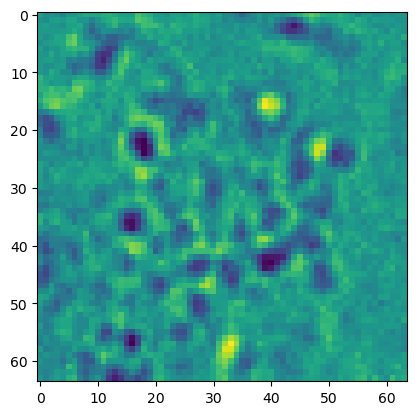

In [2]:
imgs.shape
imgs = torch.tensor(
    np.load(track_path + track_name, allow_pickle=True),
    dtype=torch.float32,
)[:, :, :, :]

plt.imshow(imgs[10, 1, :, :].detach().cpu().numpy())

In [4]:
train_model(
    directory=PATH + "track_datasets/control_mm/",
    model=model,
    # pass [1] for only BF channel, or [1,1,1] for 3 times the same channel
    # or [0,1,2] for all channels
    img_channels=[1],
    batch_size=1,
    learning_rate=1e-4,
    slice_p=0,
    name="DYCEP",
    num_epochs=5,
)

Epoch 1/5


100%|██████████| 358/358 [00:08<00:00, 41.68it/s]


    Train Loss: 0.014, Test Loss: 0.019
    Train R2: 0.893, Test R2: 0.896
Epoch 2/5


100%|██████████| 358/358 [00:06<00:00, 54.79it/s]


    Train Loss: 0.012, Test Loss: 0.017
    Train R2: 0.899, Test R2: 0.900
Epoch 3/5


100%|██████████| 358/358 [00:06<00:00, 55.20it/s]


    Train Loss: 0.011, Test Loss: 0.018
    Train R2: 0.903, Test R2: 0.905
Epoch 4/5


100%|██████████| 358/358 [00:05<00:00, 64.81it/s]


    Train Loss: 0.009, Test Loss: 0.017
    Train R2: 0.908, Test R2: 0.909
Epoch 5/5


100%|██████████| 358/358 [00:06<00:00, 54.43it/s]

    Train Loss: 0.008, Test Loss: 0.017
    Train R2: 0.912, Test R2: 0.914


'Done!'

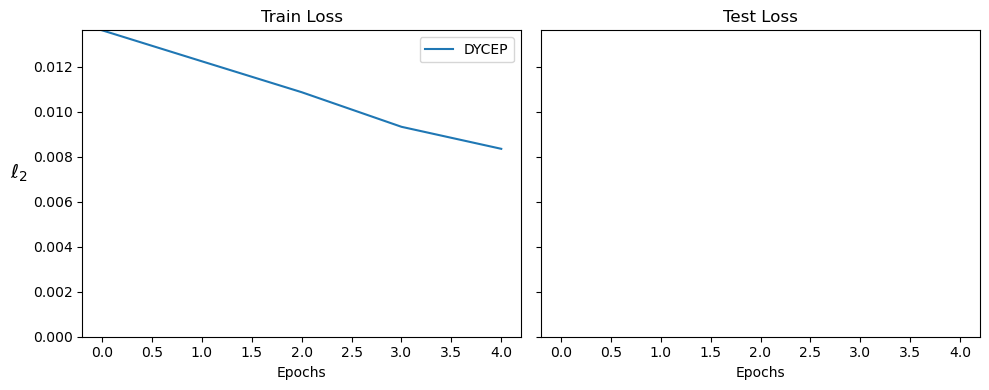

dict_keys(['number', 'path', 'name', 'model_type', 'img_channels', 'batch_size', 'num_epochs', 'learning_rate', 'train_loss', 'test_loss', 'train_R2', 'test_R2'])

In [9]:
conf_path = "weights/config-20.json"

# config-10.json
plot_loss([conf_path])

# load dict in .json file
with open(conf_path, "r") as file:
    config = json.load(file)

config.keys()


In [10]:
config["train_loss"]
config["test_loss"]

[0.018562624689162963,
 0.01725881504039306,
 0.017758926102571584,
 0.017157884787796743,
 0.017174180534306666]

In [12]:
from modules.learning.evaluate import Evaluation


model.load_state_dict(torch.load("weights/model-20.pt"))

eval = Evaluation()
eval.fit(
    PATH + "track_datasets/control_mm/test/", model, img_channels=[0], smoothing=True
)

100%|██████████| 358/358 [00:06<00:00, 56.28it/s]


In [ ]:
eval.

----------------------------------------------------------------------
Model Performance:
\ell_1: 0.116 ± 0.043
\ell_2: 0.033 ± 0.027
W_d: 0.086 ± 0.032
Accuracy: 0.762 ± 0.117



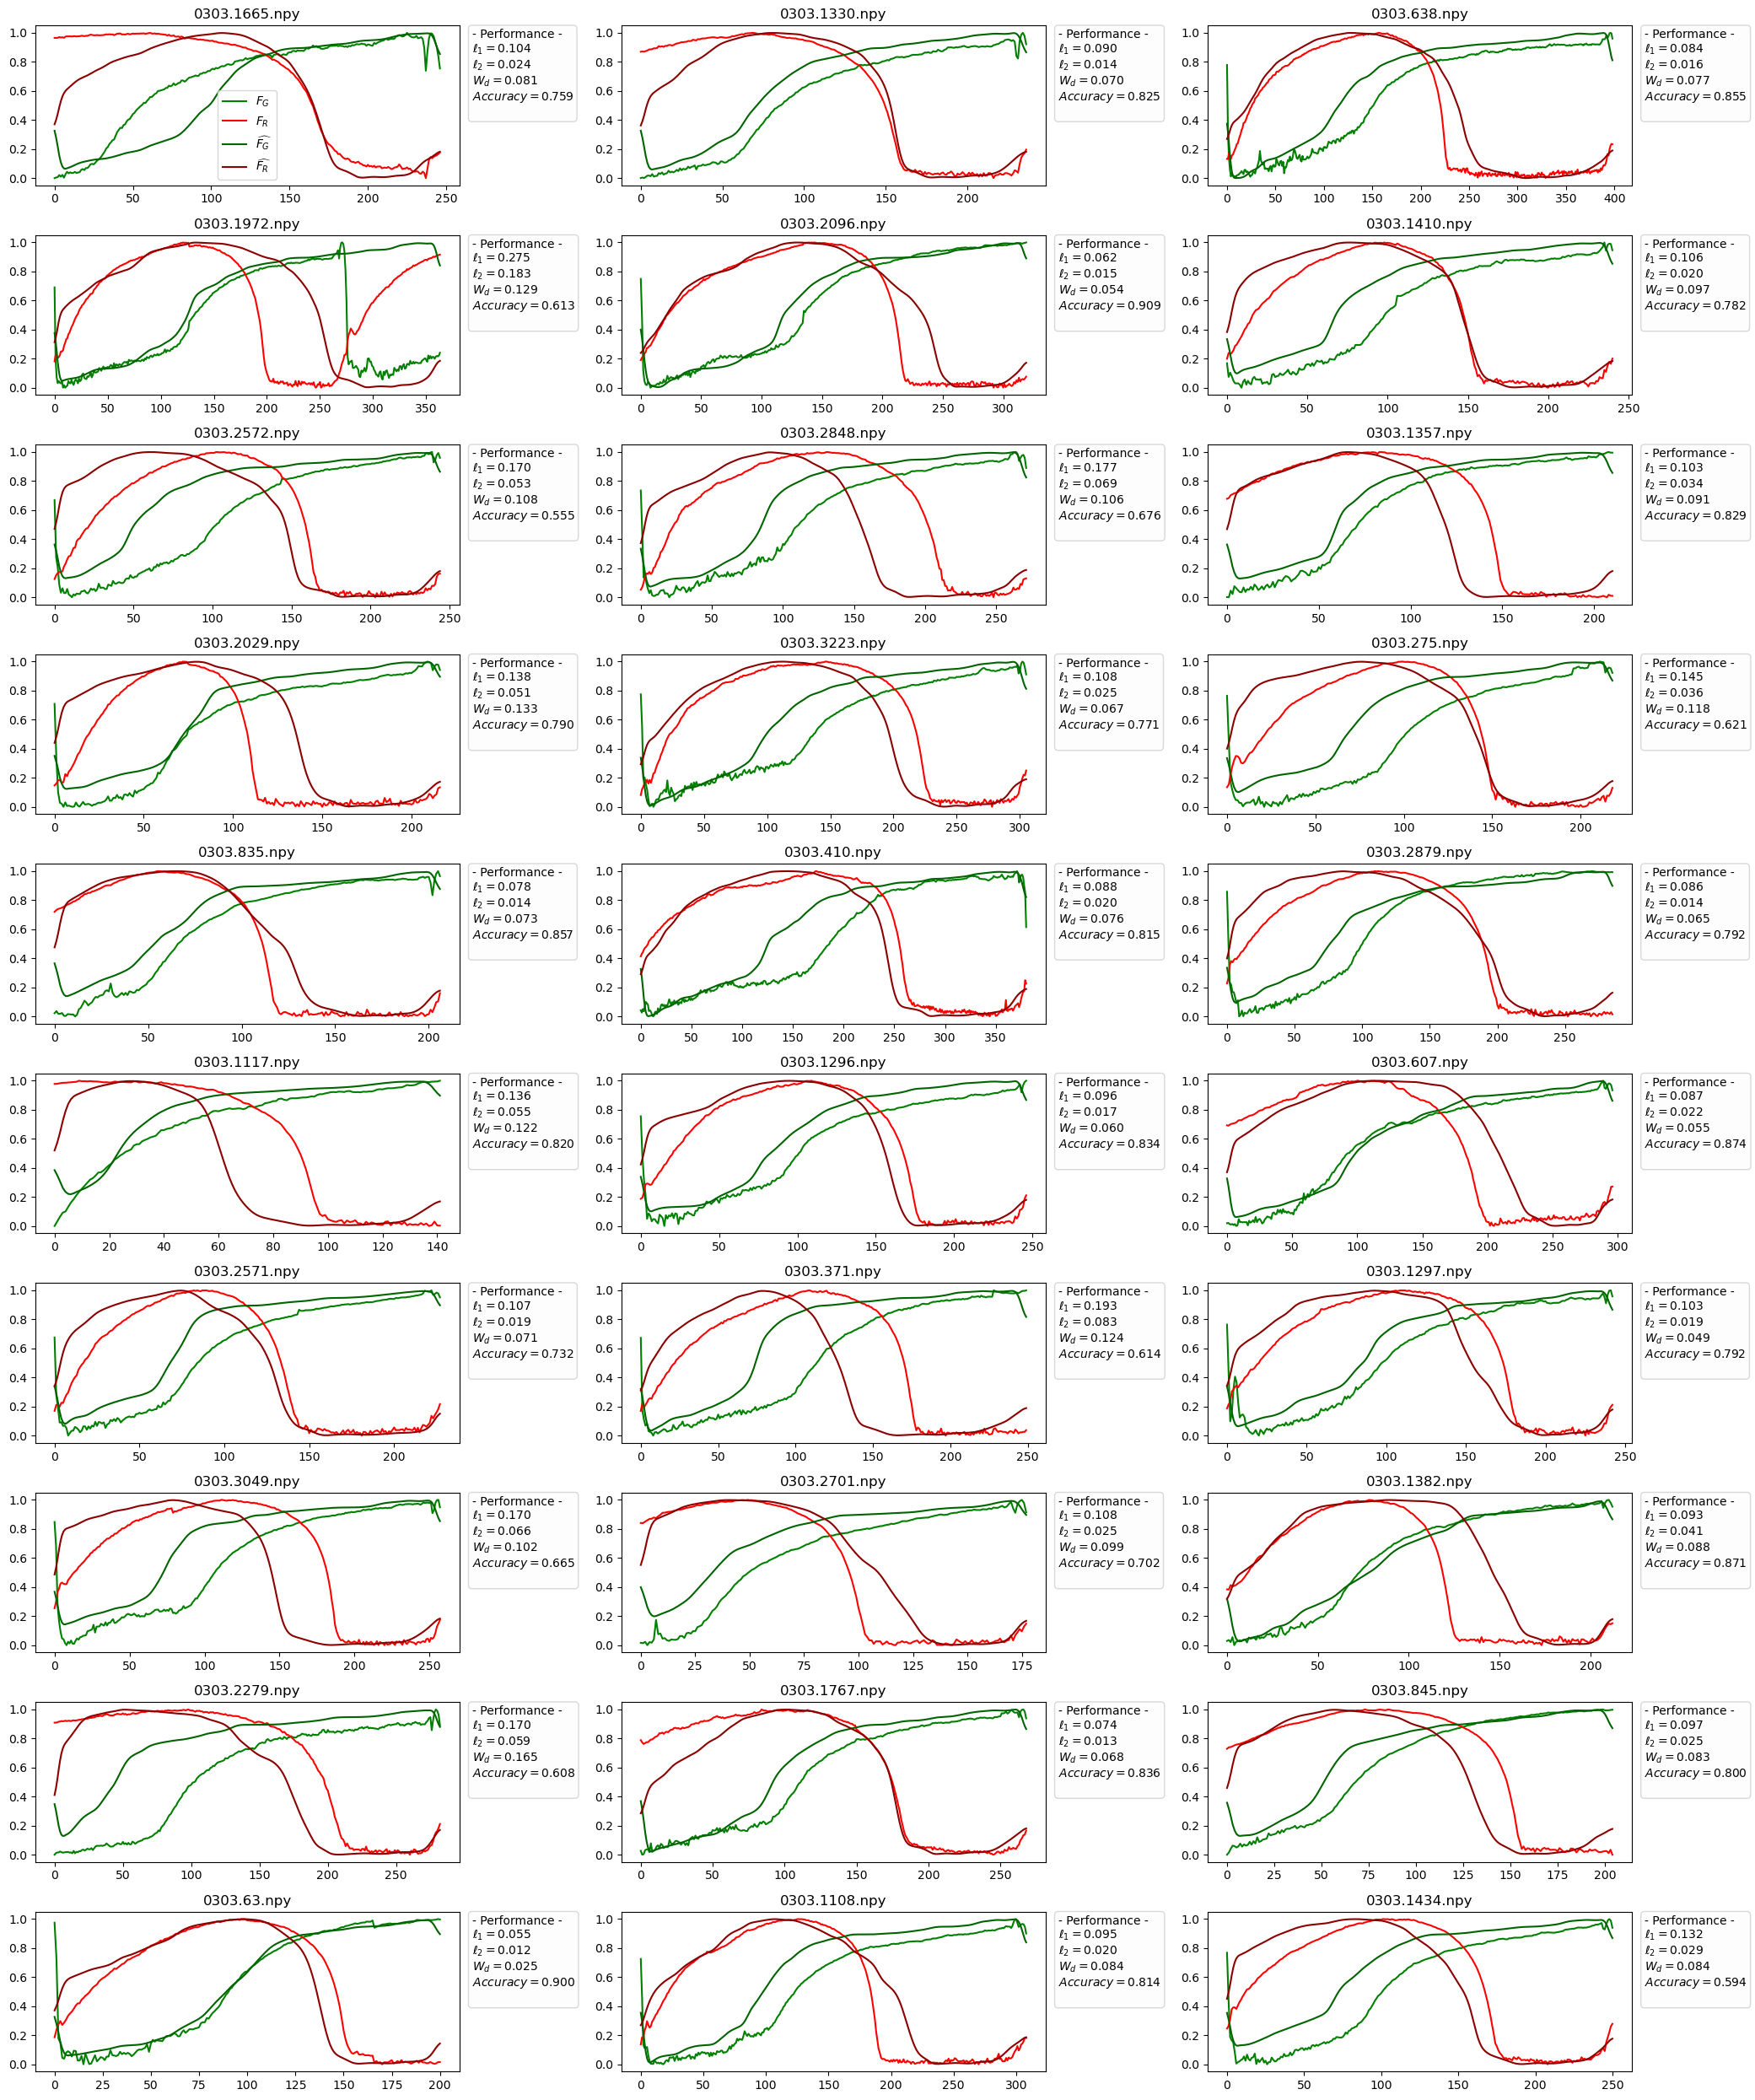

In [14]:
print(eval.summary())
eval.visualize_predicted_tracks(30)



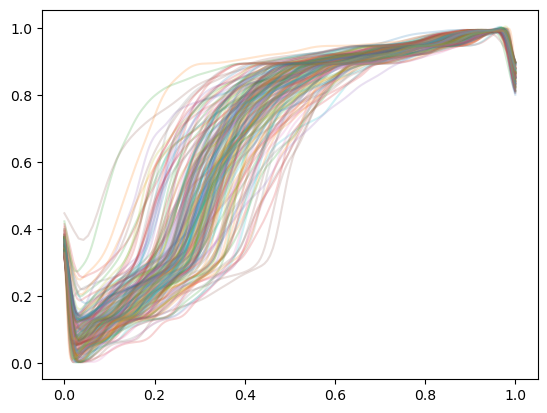

In [21]:
for i in range(200):
    track = eval.prediction_df.y_hat[i]
    tau = np.linspace(0, 1, track.shape[0])
    plt.plot(tau, track[:, 0], alpha=0.2)


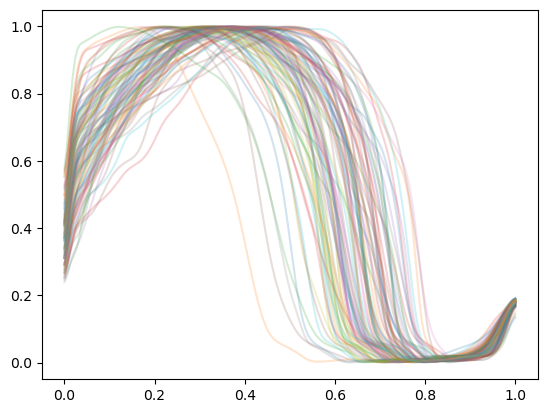

In [22]:
for i in range(100):
    track = eval.prediction_df.y_hat[i]
    tau = np.linspace(0, 1, track.shape[0])
    plt.plot(tau, track[:, 1], alpha=0.2)